### Control case studies modelling the full dataset without clustering

In [14]:
import sys

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from prepare_dataset import prepare_dataset
import pandas as pd
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 16})

sys.path.append('../src')

In [2]:
df = prepare_dataset('../data/Palladium_Database.xlsx')

In [3]:
df_train, df_test = train_test_split(df,test_size=0.1, random_state=25)

X_train = df_train.iloc[:,6:]
X_test = df_test.iloc[:,6:]
y_train = df_train['DDG']
y_test = df_test['DDG']

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear regression comparison

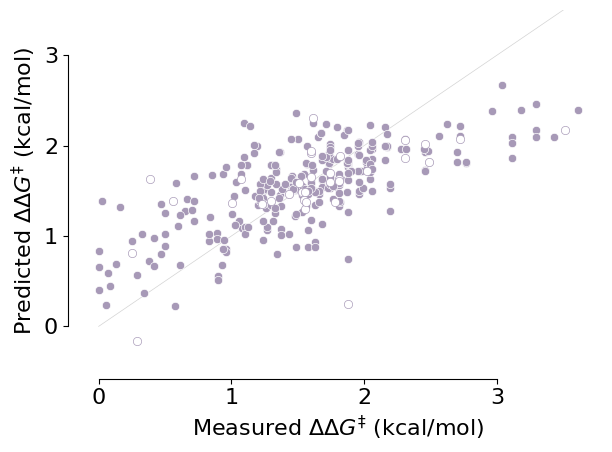

0.49657235033690106
0.399434403842345


In [16]:
model = LinearRegression().fit(X_train_scaled,y_train)
ypred = model.predict(X_train_scaled)
ytestpred = model.predict(X_test_scaled)

# sns.scatterplot(x=y_train,y=ypred, s=25, alpha=0.2, color='tab:grey')
sns.scatterplot(x=y_train,y=ypred, alpha=1, color='#A799B7')
sns.scatterplot(x=y_test,y=ytestpred, alpha=1, color='white', edgecolor='#A799B7')

sns.lineplot(x=[0,3.5],y=[0,3.5], color='lightgrey', linewidth=0.5, zorder=0)

plt.ylim(-0.5,3.5)
plt.yticks([0,1,2,3])

sns.despine(offset=5,trim=True)


plt.xlabel('Measured $\Delta\Delta G^‡$ (kcal/mol)')
plt.ylabel('Predicted $\Delta\Delta G^‡$ (kcal/mol)')

# plt.title('Linear Regression')
plt.tight_layout()
plt.savefig('fig.pdf')
plt.show()

print(r2_score(y_train,ypred))
print(mean_absolute_error(y_test,ytestpred))

Random forest comparison

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV 1/10] END max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=178;, score=0.468 total time=   0.3s
[CV 2/10] END max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=178;, score=-0.001 total time=   0.2s
[CV 3/10] END max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=178;, score=0.270 total time=   0.2s
[CV 4/10] END max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=178;, score=0.412 total time=   0.2s
[CV 5/10] END max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=178;, score=0.558 total time=   0.2s
[CV 6/10] END max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=178;, score=0.301 total time=   0.2s
[CV 7/10] END max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=178;, score=0.421 total time=   0.2s
[CV 8/10] END max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=178;, score=0.238 total tim

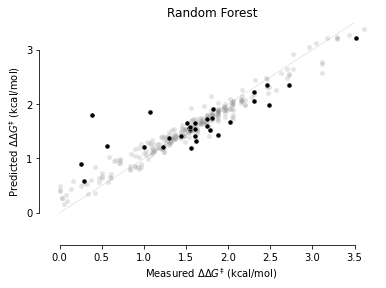

0.9518566579722111
0.6728859111423144


In [ ]:
# Hyperparameter tuning
n_estimators = range(1,200)
max_depth = range(1,200)
min_samples_split = range(2,10)
min_samples_leaf = range(1,10)

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

regressor = RandomForestRegressor()

hp_tune = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, cv=10, n_iter=150,scoring='r2', random_state=25, verbose=3)
hp_tune.fit(X_train_scaled, y_train)
print(hp_tune.best_params_)
rf_random = hp_tune.best_estimator_



ypred = rf_random.predict(X_train_scaled)
ytestpred = rf_random.predict(X_test_scaled)

sns.scatterplot(x=y_train,y=ypred, s=25, alpha=0.2, color='tab:grey')
sns.scatterplot(x=y_test,y=ytestpred, s=25, alpha=1, color='black')

sns.lineplot(x=[0,3.5],y=[0,3.5], color='lightgrey', linewidth=0.5, zorder=0)

plt.ylim(-0.5,3.5)
plt.yticks([0,1,2,3])

sns.despine(offset=5,trim=True)


plt.xlabel('Measured $\Delta\Delta G^‡$ (kcal/mol)')
plt.ylabel('Predicted $\Delta\Delta G^‡$ (kcal/mol)')

plt.title("Random Forest")

plt.show()

print(r2_score(y_train,ypred))
print(r2_score(y_test,ytestpred))

## Interpret RF model using SHAP values

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


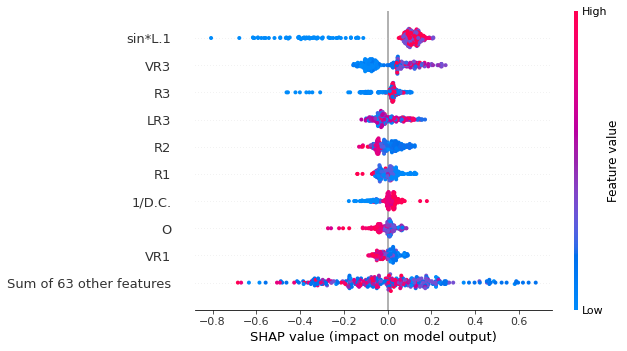

In [14]:
import shap

explainer = shap.TreeExplainer(rf_random)
shap_values = explainer(pd.DataFrame(X_train_scaled, columns=X_train.columns))

shap.plots.beeswarm(shap_values)